In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pyarrow

In [3]:
data=pd.read_feather("Sales_data.ftr")

In [4]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
data.shape

(186850, 6)

### Data Cleaning and Formatting

In [6]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
data=data.dropna(how='all')

In [8]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [10]:
data=data.drop_duplicates()

In [11]:
data.shape

(185687, 6)

In [12]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Best month for Sale

In [13]:
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [14]:
data['Order Date'][0].split('/')[0]

'04'

In [15]:
def return_month(x):
    return x.split('/')[0]

In [16]:
data['month']=data['Order Date'].apply(return_month)

In [17]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [18]:
data['month'].astype('int')

ValueError: invalid literal for int() with base 10: 'Order Date'

In [ ]:
data['month'].unique()

In [ ]:
filter1=data['month']=='Order Date'

In [ ]:
data[filter1]

In [ ]:
data=data[~filter1]

In [ ]:
data['month']=data['month'].astype('int')

In [ ]:
data.dtypes

In [ ]:
data['Quantity Ordered']=data['Quantity Ordered'].astype('int')
data['Price Each']=data['Price Each'].astype('float')

In [ ]:
data.dtypes

In [ ]:
data['Sales']=data['Quantity Ordered']*data['Price Each']

In [ ]:
data.groupby(['month'])['Sales'].sum()

In [ ]:
data.groupby(['month'])['Sales'].sum().plot(kind='bar')

In [ ]:
#Result
#Decemeber had the best sales

### Which city account for maximum order

In [ ]:
data.head(5)

In [ ]:
def excity(x):
    return x.split(',')[1]

In [ ]:
data['City']=data['Purchase Address'].apply(excity)

In [ ]:
data.head(10)

In [ ]:
data.groupby(['City'])['Sales'].sum().sort_values(ascending=False)

In [ ]:
data.groupby(['City'])['Sales'].sum().sort_values(ascending=False).plot(kind='pie',autopct = '%1.0f%%')

In [ ]:
'''
New York , Los Angeles , San Francisco are the Top 3 cities which has max order 
'''

### What product sold the most and reason behind it

In [ ]:
data.columns

In [ ]:
count_df=data.groupby(['Product']).agg({'Quantity Ordered':'sum','Price Each':'mean'})

In [ ]:
count_df

In [ ]:
count_df=count_df.reset_index()

In [ ]:
count_df

In [ ]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(count_df['Product'],count_df['Quantity Ordered'],color='g')
ax2.plot(count_df['Product'],count_df['Price Each'])
ax1.set_xticklabels(count_df['Product'].values,rotation='vertical',fontsize=8)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg Price of each Product')

In [ ]:
'''

Insights : 

The top selling product is 'AAA Batteries'. 
The top selling products seems to have a correlation with the price of the product. 
The cheaper the product higher the quantity ordered and vice versa.



'''

### Understanding the Trend of most sold product

In [22]:
most_sold=data['Product'].value_counts()[0:5].index

In [23]:
most_sold

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [24]:
data['Product'].isin(most_sold)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185687, dtype: bool

In [25]:
most_product_sold_df=data[data['Product'].isin(most_sold)]

In [26]:
most_product_sold_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04


In [27]:
# Creating pivot table 

In [28]:
most_product_sold_df.groupby(['month','Product']).size()

month  Product                 
01     AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
02     AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
03     AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
04     AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
05     AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [29]:
pivot=most_product_sold_df.groupby(['month','Product']).size().unstack()

In [30]:
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
month,,,,,
01,1037,1084,1069,1171,1004
02,1274,1320,1393,1511,1179
03,1672,1645,1749,1766,1512
04,2062,1988,2197,2074,1888
05,1821,1888,1929,1879,1729
06,1540,1451,1560,1531,1334
07,1555,1554,1690,1667,1434
08,1357,1340,1354,1339,1191
09,1314,1281,1324,1451,1173


<AxesSubplot:xlabel='month'>

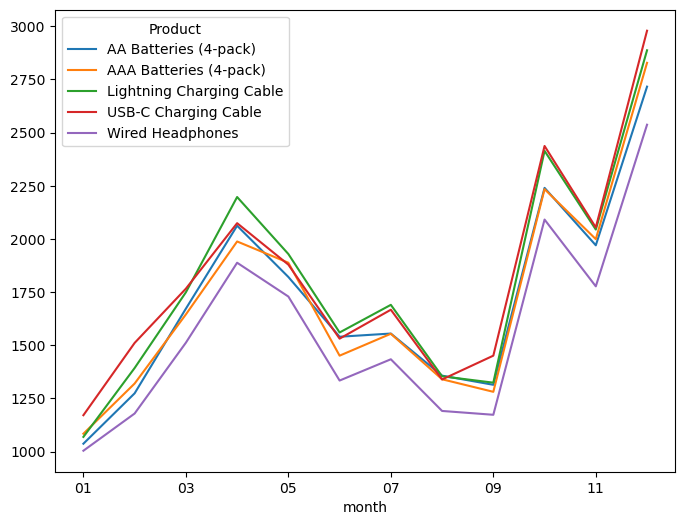

In [31]:
pivot.plot(figsize=(8,6))

### What products are often sold together???

In [32]:
data['Order ID'].duplicated(keep=False)

0         False
2         False
3          True
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 185687, dtype: bool

In [33]:
duplicated_df=data[data['Order ID'].duplicated(keep=False)]

In [34]:
duplicated_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",04


In [36]:
#Joining and  creating column having grouped products

In [37]:
duplicated_df.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index()

,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [39]:
duplicated_df.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index().rename(columns={'Product':'Grouped_Products'})

,Order ID,Grouped_Products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [40]:
grouped_df=duplicated_df.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index().rename(columns={'Product':'Grouped_Products'})

In [41]:
grouped_df.head()

,Order ID,Grouped_Products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"


In [42]:
dup_products=duplicated_df.merge(grouped_df,how='left',on='Order ID')

In [43]:
dup_products.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Grouped_Products
0,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",04,"AAA Batteries (4-pack),Google Phone"


In [44]:
dup_products.shape

(14128, 8)

In [45]:
no_dup_df=dup_products.drop_duplicates(subset=['Order ID'])

In [46]:
no_dup_df.shape

(6879, 8)

In [47]:
no_dup_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Grouped_Products
0,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",04,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",04,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",04,"Apple Airpods Headphones,ThinkPad Laptop"


In [48]:
no_dup_df['Grouped_Products'].value_counts()

iPhone,Lightning Charging Cable                     886
Google Phone,USB-C Charging Cable                   857
iPhone,Wired Headphones                             361
Vareebadd Phone,USB-C Charging Cable                312
Google Phone,Wired Headphones                       303
                                                   ... 
34in Ultrawide Monitor,20in Monitor                   1
Google Phone,Wired Headphones,Macbook Pro Laptop      1
LG Dryer,Vareebadd Phone                              1
20in Monitor,34in Ultrawide Monitor                   1
LG Washing Machine,AA Batteries (4-pack)              1
Name: Grouped_Products, Length: 350, dtype: int64

<AxesSubplot:>

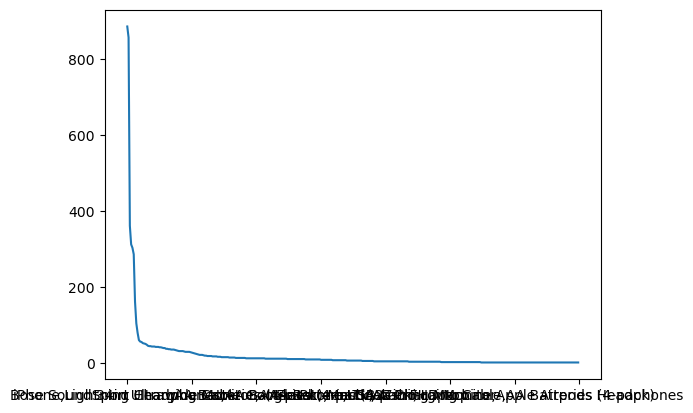

In [49]:
no_dup_df['Grouped_Products'].value_counts().plot()

<AxesSubplot:ylabel='Grouped_Products'>

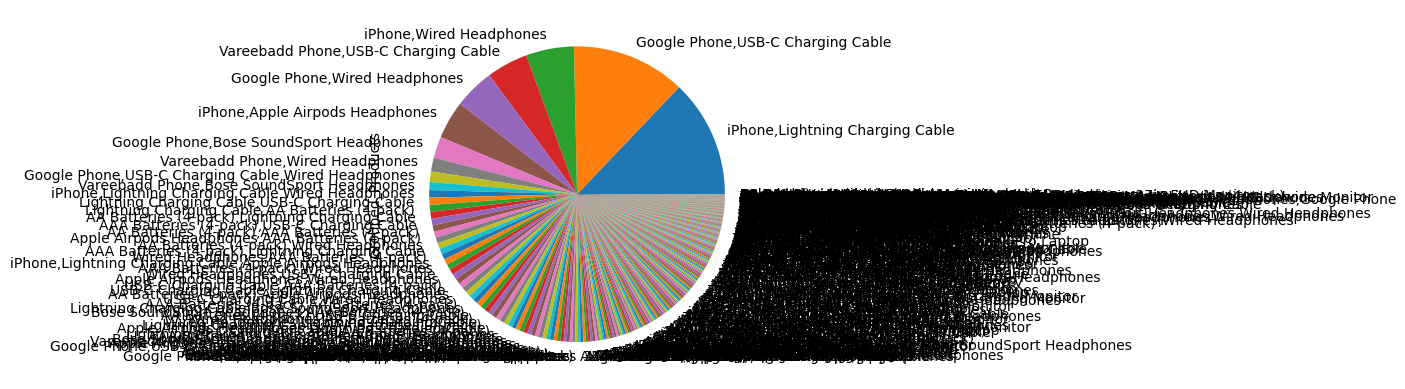

In [50]:
no_dup_df['Grouped_Products'].value_counts().plot.pie()

<AxesSubplot:ylabel='Grouped_Products'>

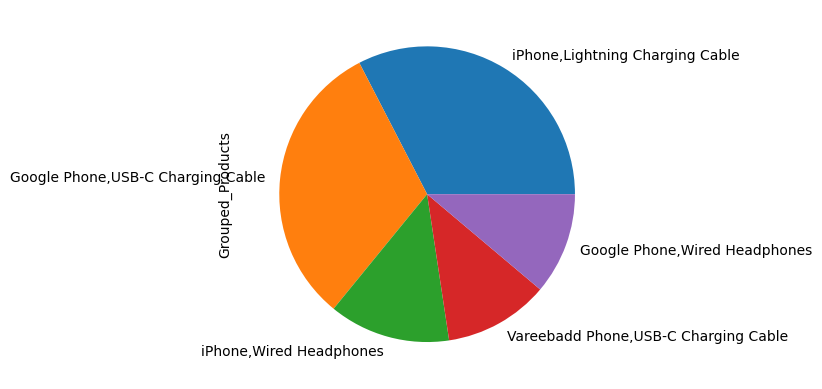

In [51]:
no_dup_df['Grouped_Products'].value_counts()[0:5].plot.pie()